# Group 7 Clustering Project

# Research Questions

1. How can Spotify implement advanced **machine learning algorithms (unsupervised)** to improve its recommendation engine leading to reduced Churn rate, improved music discovery, and heightened user engagement?

2. What are the key features in determining the similarity of recommended music?

3. What features are most/least useful for predicting a track's popularity?

# Business Understanding

Spotify is a music streaming platform launched in 2008.With more than 100 million tracks and 350,000 audio books, spotify is the largest music streaming platform in the world. Spotify's business model is via the advertisement model in which ads are played while (free tier) listeners play music on the platform or subscription model in which premium listeners pay a monthly subscription fee. From every fee paid to spotify, a percentage is paid to the **music right holders (record holders, distributors, collecting societies)** who then pay the artists


Central to the Spotify platform is the recommendation engine utilized to suggest music to listeners. This recommendation engine is key in keeping listeners engaged (free tier or premium listeners). To drive engagement on the platform, reduce churn rate and improve music discovery, we ask the question below:

- How can Spotify implement advanced machine learning algorithms (unsupervised) to improve its recommendation engine leading to reduced Churn rate, improved music discovery, and heightened user engagement?


To answer this question we implement a `clustering algorithm`. We aim to discover subgroups in the data that span the traditional grouping according to genre and artist et al. 

To perform clustering, we will utilize three apporaches:
- K-means Clustering: Here, we will seek to partition the observations into a pre-specified number of clusters.



## Predicting Track Popularity

To provide an understanding into features that make tracks popular, we seek to understand what features are instrumental in explaining track popularity. To do this, we model our data as a classification problem wheter tracks with a populariy >= 50 are classified as populare and the other tracks and not popular.

We then utilize `logistic regression` and `decision tree` models to understand the statistically significant features that determine the popularity of a track.

In [63]:
library(tidymodels)
library(tidyverse)
library(tidyclust)


In [64]:
spotify_df <- read_csv('spotify_data.csv', show_col_types = FALSE)

# Set Seed and Select 50_000 records
set.seed(123)

# Load the dataset
spotify_df <- sample_n(spotify_df, 50000)

# Preview the dataset
head(spotify_df)

track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
78PDj0uocOvtSJCdOt65qy,Yo Yo Honey Singh,Bhaag Johnny,Aankhon Aankhon,59,244831,FALSE,0.746,0.988,10,-4.565,0,0.0637,0.290000,2.18e-03,0.1310,0.6100,130.042,4,hip-hop
1hP0hDL5VREpThmMOa1pta,Shakti Sivamani,Ailesa,Ailesa,42,250601,FALSE,0.628,0.790,5,-7.159,0,0.0655,0.270000,6.83e-04,0.6060,0.4700,132.983,4,indie
5EL8He4J2hrTWl9rxbE3DY,Babasónicos,Desde Adentro - Impuesto de Fe (En Vivo),El Maestro - En Vivo,44,170866,FALSE,0.650,0.915,4,-5.761,0,0.0368,0.446000,0.00e+00,0.9100,0.8850,112.028,4,alt-rock
46VgwcEKnjPCcSEsJ5fWY2,Control Freak,Sable Valley Summer Vol. 2,No Chill,39,178285,FALSE,0.593,0.937,1,-6.703,0,0.0566,0.000397,6.28e-01,0.3020,0.0333,139.933,4,dubstep
0WjreSYeix5YZRbwsbPv6T,LA INDIA,The Greatest Salsa Ever,Nunca Voy A Olvidarte,34,299613,FALSE,0.546,0.628,6,-10.289,1,0.0441,0.625000,1.10e-02,0.0801,0.7080,173.872,4,salsa
07U6dNp0xM9htc4A7I69LM,Omar Apollo,All That Really Matters - Just Hits,Archetype,4,168828,FALSE,0.676,0.338,9,-7.960,1,0.0284,0.372000,5.57e-06,0.4680,0.3210,92.029,4,soul


In [65]:
# Taking a glimpse of the Dataset
glimpse(spotify_df)

Rows: 50,000
Columns: 20
$ track_id         <chr> "78PDj0uocOvtSJCdOt65qy", "1hP0hDL5VREpThmMOa1pta", "…
$ artists          <chr> "Yo Yo Honey Singh", "Shakti Sivamani", "Babasónicos"…
$ album_name       <chr> "Bhaag Johnny", "Ailesa", "Desde Adentro - Impuesto d…
$ track_name       <chr> "Aankhon Aankhon", "Ailesa", "El Maestro - En Vivo", …
$ popularity       <dbl> 59, 42, 44, 39, 34, 4, 0, 55, 35, 57, 21, 29, 46, 5, …
$ duration_ms      <dbl> 244831, 250601, 170866, 178285, 299613, 168828, 19401…
$ explicit         <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALS…
$ danceability     <dbl> 0.746, 0.628, 0.650, 0.593, 0.546, 0.676, 0.787, 0.60…
$ energy           <dbl> 0.9880, 0.7900, 0.9150, 0.9370, 0.6280, 0.3380, 0.872…
$ key              <dbl> 10, 5, 4, 1, 6, 9, 9, 2, 0, 7, 5, 2, 11, 11, 0, 0, 0,…
$ loudness         <dbl> -4.565, -7.159, -5.761, -6.703, -10.289, -7.960, -2.1…
$ mode             <dbl> 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,…
$ speechiness  

# Getting the dataset in a Tidy Format - Data Understanding

## Checking for Duplicate Data

In [66]:
# Removing Duplicate Data
spotify_df <- spotify_df |>
            # Keep only distinct records
            distinct( )

In [67]:
# Tacking a glimpse of the de-duplicated data
glimpse(spotify_df)

Rows: 49,910
Columns: 20
$ track_id         <chr> "78PDj0uocOvtSJCdOt65qy", "1hP0hDL5VREpThmMOa1pta", "…
$ artists          <chr> "Yo Yo Honey Singh", "Shakti Sivamani", "Babasónicos"…
$ album_name       <chr> "Bhaag Johnny", "Ailesa", "Desde Adentro - Impuesto d…
$ track_name       <chr> "Aankhon Aankhon", "Ailesa", "El Maestro - En Vivo", …
$ popularity       <dbl> 59, 42, 44, 39, 34, 4, 0, 55, 35, 57, 21, 29, 46, 5, …
$ duration_ms      <dbl> 244831, 250601, 170866, 178285, 299613, 168828, 19401…
$ explicit         <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALS…
$ danceability     <dbl> 0.746, 0.628, 0.650, 0.593, 0.546, 0.676, 0.787, 0.60…
$ energy           <dbl> 0.9880, 0.7900, 0.9150, 0.9370, 0.6280, 0.3380, 0.872…
$ key              <dbl> 10, 5, 4, 1, 6, 9, 9, 2, 0, 7, 5, 2, 11, 11, 0, 0, 0,…
$ loudness         <dbl> -4.565, -7.159, -5.761, -6.703, -10.289, -7.960, -2.1…
$ mode             <dbl> 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,…
$ speechiness  

## Checking for Null Values

In [68]:
# Checking for Missing Values for each variable
colSums(is.na(spotify_df))

track_id          artists       album_name       track_name 
               0                1                1                1 
      popularity      duration_ms         explicit     danceability 
               0                0                0                0 
          energy              key         loudness             mode 
               0                0                0                0 
     speechiness     acousticness instrumentalness         liveness 
               0                0                0                0 
         valence            tempo   time_signature      track_genre 
               0                0                0                0

> From the above the column artist has a missing value, trackname has a missing value, and album name has a missing value. All other variable have no missing values

In [69]:
# How many distinct artists do we have in this dataset
spotify_df |>
    summarise(unique_artist_count = n_distinct(artists))

unique_artist_count
<int>
19555


Selecting by count


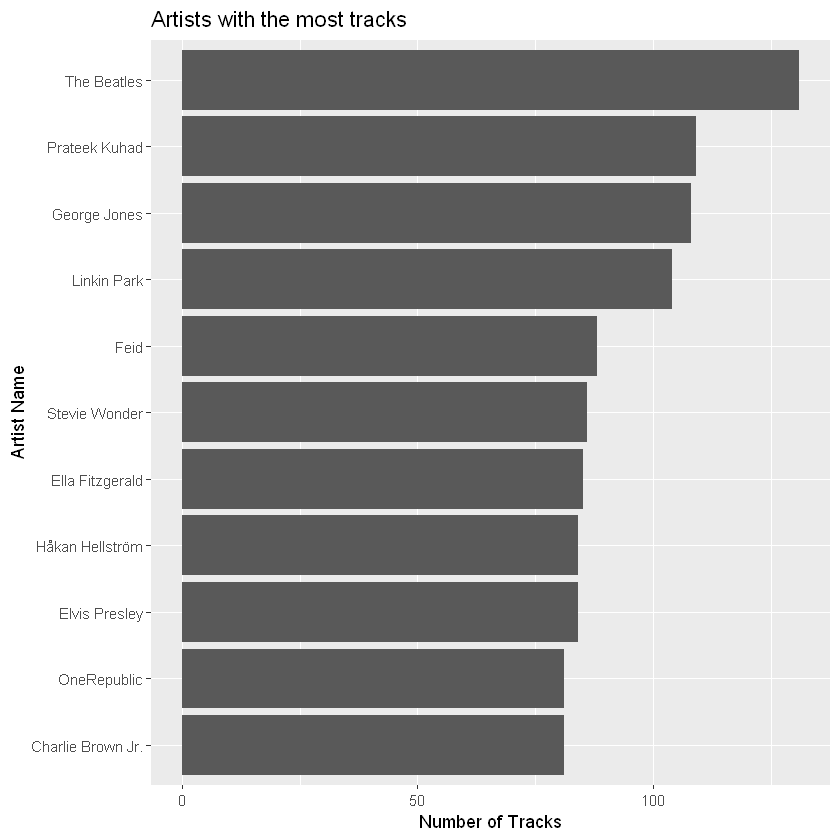

In [71]:
# Creating A Plot for Top 10 Artists in the DF
spotify_df |>
    # Group by the artist and summarise the number of recors the artist has in the data
    summarise(.by = artists, count=n()) |>
    # Order by the count
    arrange(-count) |>
    # Take the top 5
    top_n(10) |>
    # Plotting
    ggplot(
        aes(x = reorder(artists, count), y = count)
    ) +
    geom_bar(stat = 'identity') +
    coord_flip() + 
    labs(
        title = 'Artists with the most tracks',
        y = 'Number of Tracks',
        x = 'Artist Name'
        
    )
    

> From the above, all artists not in the top 10 will be considered as a single factor in the pre-processing for modeling.

In [72]:
# How many distinct album names do we have in this dataset
spotify_df |>
    summarise(unique_album_name = n_distinct(album_name))

unique_album_name
<int>
27174


> There are 27174 album names in this dataset. We will not be using all these album names for encoding.

Selecting by count


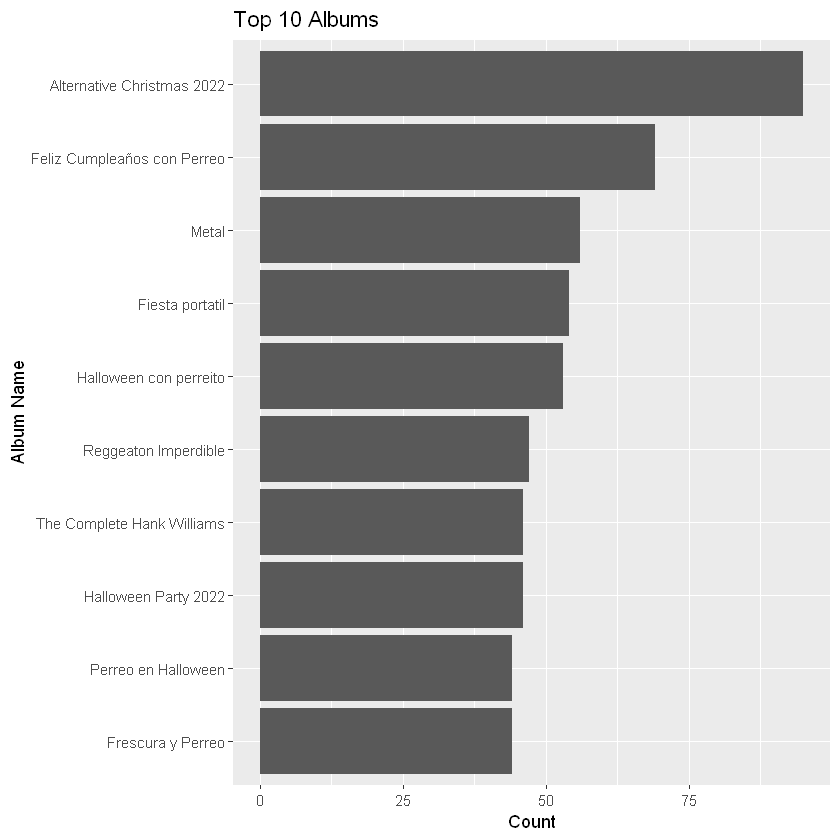

In [75]:
# Creating a Graph for the top 10 Albums in the DF
spotify_df |>
    # Group by the album_name and summarise the number of recors the artist has in the data
    summarise(.by = album_name, count=n()) |>
    # Order by the count
    arrange(-count) |>
    # Take the top 10
    top_n(10) |>
    ggplot(
        aes(x = reorder(album_name, count), y = count)
    ) +
    geom_bar(stat = 'identity') +
    coord_flip() + 
    labs(
        title = 'Top 10 Albums',
        y = 'Count',
        x = 'Album Name'   
        )

> All album names not in the top 10 will be encoded as `other`

Selecting by count


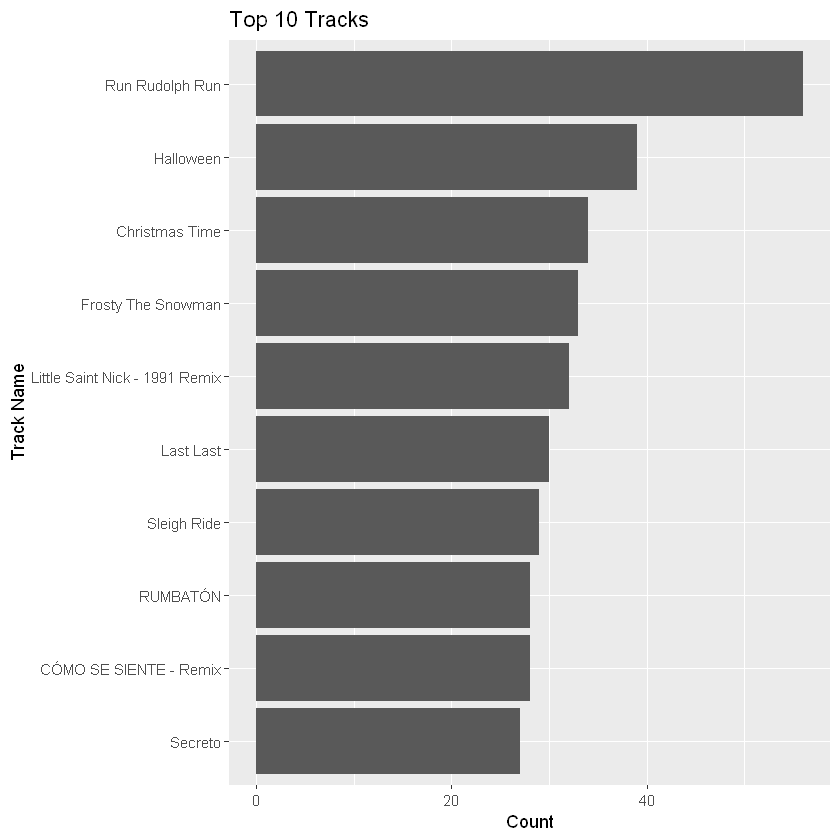

In [77]:
# Creating a Chart for Popular Tracks
spotify_df |>
    # Group by the track_name and summarise the number of recors the artist has in the data
    summarise(.by = track_name, count=n()) |>
    # Order by the count
    arrange(-count) |>
    # Take the top 10
    top_n(10) |>
    # Plot
    ggplot(
        aes(x = reorder(track_name, count), y = count)
    ) +
    geom_bar(stat = 'identity') +
    coord_flip() + 
    labs(
        title = 'Top 10 Tracks',
        y = 'Count',
        x = 'Track Name'
        )

> The Track Genre Colum will be maintained as is and encoded in the pre-processing.

# Creating The Recipe

In [78]:
# Preparing the dataset pipeline
clust_rec  <-   recipe(~ ., data = spotify_df) |>
                    # Update the roles of variables - These are not used in the Clustering Procedure
                    update_role(track_id, new_role = 'ID') |>
                    update_role(track_name, new_role = 'track_name') |>
                    update_role(artists, new_role = 'artist_name') |>
                    update_role(album_name, new_role = 'album_name') |>
                    # Mutate the logical column - explicit
                    step_mutate(explicit = as.numeric(explicit)) |>
                    # Creating dummy variables with the track_genre
                    step_other(track_genre, threshold = 0.009) |>
                    # Here, we dummy all the predictors
                    step_dummy(all_nominal_predictors()) |>
                    # kmeans is sensitive to distances so we normalize the data
                    step_normalize(all_numeric_predictors()) |>
                    # Remove null values from the predictors
                    step_naomit(all_predictors())

In [79]:
# Preview the Clustering Pipeline
clust_rec |>
    prep() |>
    bake(new_data=NULL) |>
    glimpse()

Rows: 49,910
Columns: 46
$ track_id                <fct> 78PDj0uocOvtSJCdOt65qy, 1hP0hDL5VREpThmMOa1pta…
$ artists                 <fct> "Yo Yo Honey Singh", "Shakti Sivamani", "Babas…
$ album_name              <fct> "Bhaag Johnny", "Ailesa", "Desde Adentro - Imp…
$ track_name              <fct> "Aankhon Aankhon", "Ailesa", "El Maestro - En …
$ popularity              <dbl> 1.15220769, 0.38983418, 0.47952518, 0.25529768…
$ duration_ms             <dbl> 0.15064399, 0.20293212, -0.51963180, -0.452400…
$ explicit                <dbl> -0.3051644, -0.3051644, -0.3051644, -0.3051644…
$ danceability            <dbl> 1.0313247, 0.3490043, 0.4762166, 0.1466212, -0…
$ energy                  <dbl> 1.375316404, 0.587560326, 1.084881082, 1.17240…
$ key                     <dbl> 1.32401277, -0.08085819, -0.36183238, -1.20475…
$ loudness                <dbl> 0.73460869, 0.21448138, 0.49479671, 0.30591470…
$ mode                    <dbl> -1.3235551, -1.3235551, -1.3235551, -1.3235551…
$ speechiness  

# K-means clustering with the Columns as Recipes - Modelling

In [80]:
# Specifying 5 fold Cross Validation
clust_cv <- vfold_cv(spotify_df, v = 5)

In [81]:
# Specifying the model and the tuning parameter
model_kmeans <- k_means(num_clusters = tune()) |>
                    # Set the Engine
                    set_engine('stats')

In [82]:
set.seed(123)
# Set the Pipeline
kmeans_wflow <- workflow() |>
                    # Add the model
                    add_model(model_kmeans) |>
                    # Add the pipeline
                    add_recipe(clust_rec)


# Number of clusters
clust_num_grid <- grid_regular(
                        # Setting the number of clusters
                        num_clusters(c(1L, 150L)),
                        # Levels
                        levels = 10
                              )

In [83]:
# Lets tune the cluster
res <- tune_cluster(
                        kmeans_wflow,
                        resamples = clust_cv,
                        grid = clust_num_grid,
                        control = control_grid(save_pred = TRUE, extract = identity),
                        metrics = cluster_metric_set(sse_within_total, sse_total, sse_ratio)
                    )

# res

! Fold1: preprocessor 1/1, model 4/10: did not converge in 10 iterations

! Fold1: preprocessor 1/1, model 6/10: Quick-TRANSfer stage steps exceeded maximu...

! Fold1: preprocessor 1/1, model 8/10: did not converge in 10 iterations

! Fold1: preprocessor 1/1, model 9/10: did not converge in 10 iterations

! Fold2: preprocessor 1/1, model 6/10: did not converge in 10 iterations

! Fold2: preprocessor 1/1, model 8/10: did not converge in 10 iterations

! Fold2: preprocessor 1/1, model 9/10: did not converge in 10 iterations

! Fold3: preprocessor 1/1, model 3/10: did not converge in 10 iterations

! Fold3: preprocessor 1/1, model 4/10: did not converge in 10 iterations

! Fold3: preprocessor 1/1, model 6/10: did not converge in 10 iterations

! Fold3: preprocessor 1/1, model 7/10: did not converge in 10 iterations

! Fold4: preprocessor 1/1, model 4/10: did not converge in 10 iterations

! Fold4: preprocessor 1/1, model 6/10: did not converge in 10 iterations

! Fold4: preprocessor 1/1,

In [84]:
result_metrics <-  res |>
                    # Get the metrics
                    collect_metrics()

result_metrics

num_clusters,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,sse_ratio,standard,1.000000e+00,5,0.000000e+00,Preprocessor1_Model01
1,sse_total,standard,1.828657e+06,5,3.871066e+04,Preprocessor1_Model01
1,sse_within_total,standard,1.828657e+06,5,3.871066e+04,Preprocessor1_Model01
17,sse_ratio,standard,6.430199e-01,5,6.158417e-03,Preprocessor1_Model02
17,sse_total,standard,1.828657e+06,5,3.871066e+04,Preprocessor1_Model02
17,sse_within_total,standard,1.176671e+06,5,3.494263e+04,Preprocessor1_Model02
34,sse_ratio,standard,4.042606e-01,5,2.580064e-02,Preprocessor1_Model03
34,sse_total,standard,1.828657e+06,5,3.871066e+04,Preprocessor1_Model03
34,sse_within_total,standard,7.425878e+05,5,6.231091e+04,Preprocessor1_Model03


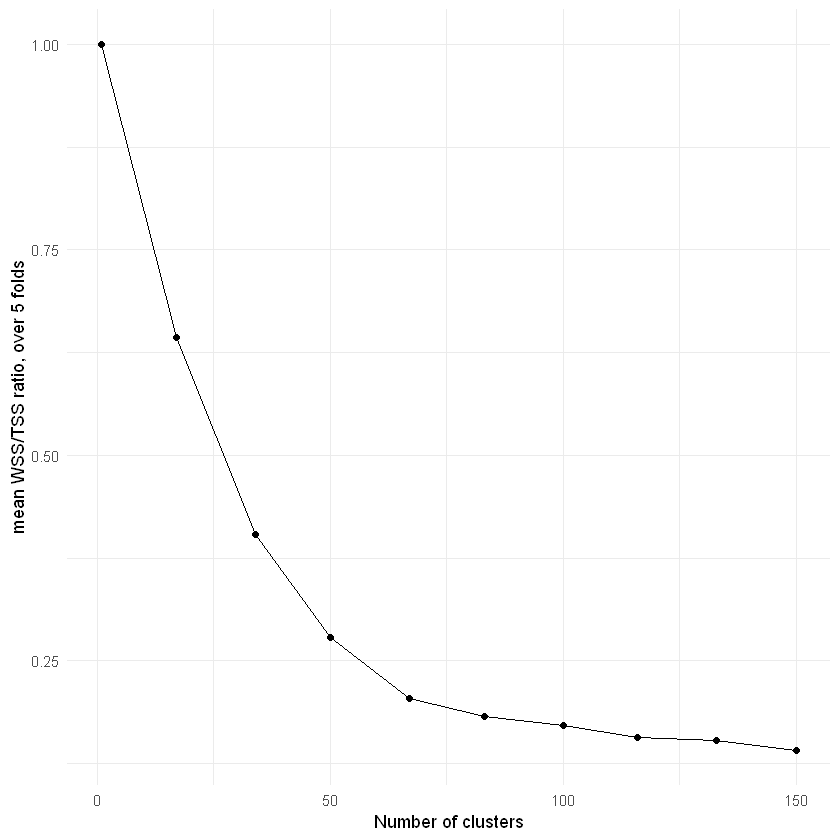

In [85]:
result_metrics %>%
  filter(.metric == "sse_ratio") %>%
  ggplot(aes(x = num_clusters, y = mean)) +
  geom_point() +
  geom_line() +
  theme_minimal() +
  ylab("mean WSS/TSS ratio, over 5 folds") +
  xlab("Number of clusters") #+
  # scale_x_continuous(breaks = 1:50)

> We decided to use `67 clusters`.

In [86]:
# Clean the entire spotify data
clean_sptfy_df <- clust_rec |>
                    prep() |>
                    bake(new_data=NULL)


sptfy_df <- clean_sptfy_df |>
                select(c(-track_id, -artists, -album_name, -track_name))

In [91]:
# Using K-means Cluster of 67

# Specifying kmeans
kmeans_spec <- k_means(num_clusters = 67)


# Fitting kmeans
kmeans_fit <- kmeans_spec |>
                fit( ~ ., data = sptfy_df)

# Creating a Recommended DF with the prediction
rec_df <- kmeans_fit |>
            augment(clean_sptfy_df)


rec_df$pred_cluster = rec_df$.pred_cluster 

Warning message:
"did not converge in 10 iterations"


In [92]:
rec_df |>
    # Filter Cluster 1
    summarise(.by = pred_cluster, count = n())

pred_cluster,count
<fct>,<int>
Cluster_1,1510
Cluster_2,1464
Cluster_3,1063
Cluster_4,1353
Cluster_5,459
Cluster_6,1332
Cluster_7,1295
Cluster_8,460
Cluster_9,275


In [30]:
# Previewing Cluster 2
rec_df |>
    select(c(pred_cluster, artists, album_name, track_name)) |>
    filter(pred_cluster == 'Cluster_2')

pred_cluster,artists,album_name,track_name
<fct>,<fct>,<fct>,<fct>
Cluster_2,Shakti Sivamani,Ailesa,Ailesa
Cluster_2,Babasónicos,Desde Adentro - Impuesto de Fe (En Vivo),El Maestro - En Vivo
Cluster_2,Afrojack;R3HAB;Au/Ra,Electro sounds,Worlds On Fire
Cluster_2,Barão Vermelho,Balada MTV,Puro êxtase
Cluster_2,Bobby Rydell,The Best Of Bobby Rydell,Sway
Cluster_2,Official HIGE DANdism,One-Man Tour 2021-2022 -Editorial-@Saitama Super Arena (LIVE),Bedroom Talk - LIVE
Cluster_2,Ritviz,Mimmi,Pukaar
Cluster_2,Sonu Nigam,Devi Bhajan - Sonu Nigam,"Nanhe Nanhe Paon Mere (From ""Meri Maa"")"
Cluster_2,Biquini Cavadão,Ao Vivo,Múmias


In [31]:
# Previewing Cluster 3
rec_df |>
    select(c(pred_cluster, artists, album_name, track_name)) |>
    filter(pred_cluster == 'Cluster_3')

pred_cluster,artists,album_name,track_name
<fct>,<fct>,<fct>,<fct>
Cluster_3,Control Freak,Sable Valley Summer Vol. 2,No Chill
Cluster_3,Devil Master,Ecstasies Of Never Ending Night,Shrines in Cinder
Cluster_3,"Sarah, the Illstrumentalist",Constellations,Canis Major
Cluster_3,Windir,Likferd,Martyrium
Cluster_3,Molchat Doma,Этажи,Судно (Борис Рижий)
Cluster_3,Demon Hunter,HEAVEN DON'T CRY,HEAVEN DON'T CRY
Cluster_3,The Thrillseekers;En-Motion,Trance Top 1000 (Mini Mix 003) - Armada Music,Synaesthesia (Mixed) - En-Motion Remix
Cluster_3,Mayhem,Deathcrush,Deathcrush
Cluster_3,Behemoth,Evangelion,Ov Fire and the Void


In [32]:
# Previewing Cluster 50
rec_df |>
    select(c(pred_cluster, artists, album_name, track_name)) |>
    filter(pred_cluster == 'Cluster_50')

pred_cluster,artists,album_name,track_name
<fct>,<fct>,<fct>,<fct>
Cluster_50,Ed Solo;Deekline,"Always RIP, Pt. 1",Always RIP - Eddie K & Minus Remix
Cluster_50,The Prodigy;Tom Morello,Spawn The Album,ONE MAN ARMY
Cluster_50,Lo Fidelity Allstars;Pigeonhed,How to Operate With a Blown Mind,Battleflag (feat. Pigeonhed)
Cluster_50,The Prodigy,Music for the Jilted Generation,Voodoo People
Cluster_50,Dub Pistols,Speakers and Tweeters,Speakers and Tweeters
Cluster_50,Freestylers,Adventures In Freestyle,Beat It Down
Cluster_50,Freddy Fresh,Badder Badder Schwing,What It Is
Cluster_50,Audio Bullys;Nancy Sinatra,I'm In Love,Shot You Down - Audio Bullys Remix Edit; Feat. Nancy Sinatra
Cluster_50,Yo Speed,Fx,Fx


In [33]:
# Previewing Cluster 67
rec_df |>
    select(c(pred_cluster, artists, album_name, track_name)) |>
    filter(pred_cluster == 'Cluster_67')

pred_cluster,artists,album_name,track_name
<fct>,<fct>,<fct>,<fct>
Cluster_67,Mark Farina,House of OM (DJ Mix),House of Om - Mark Farina - Continuous Mix
Cluster_67,Estas Tonne,Internal Flight (Remastered),Internal Flight (Remastered)
Cluster_67,Tale Of Us,Unity (Voyage Mix),Unity (Voyage Mix) Pt. 1
Cluster_67,Mark Farina,Greenhouse Construction,Greenhouse Construction
Cluster_67,Seth Troxler,Seth Troxler - The Lab 03,The Lab 03 - Continuous DJ Mix Part 1
Cluster_67,Timo Maas,Crossing Wires 002 - Compiled And Mixed By Timo Maas,Crossing Wires 002 - Continuous DJ Mix
Cluster_67,Michael Wendler,Der ultimative Wendler Hitmix,Der ultimative Wendler Hitmix XL
Cluster_67,Electric Dreams,Electric Fan (Sound Masking Fan),Electric Fan (Sound Masking Fan)
Cluster_67,Lady Waks,Bass Shakers 2015,"Bass Shakers 2015 - Continuous DJ Mix, Pt. 1"


### What are the most key features in determining similarity of recommended music?

- popularity              
- duration_ms             
- explicit                
- danceability            
- energy                  
- key                     
- loudness                
- mode                    
- speechiness             
- acousticness            
- instrumentalness        
- liveness                
- valence                 
- tempo                   
- time_signature          
- track_genre   

### What are the most popular tracks by the genre of the track?

In [34]:
spotify_df |>
    # Filter for mpst popular
    filter(popularity >= 85) |>
    # Groupby Genre
    summarise(.by = track_genre,  count = n()) |>
    # Arrange in Descending Order
    arrange(-count)
    

track_genre,count
<chr>,<int>
pop,36
reggaeton,15
dance,15
hip-hop,12
rock,12
latino,11
electro,9
reggae,9
edm,6


### What features are most/least useful for predicting a track's popularity?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


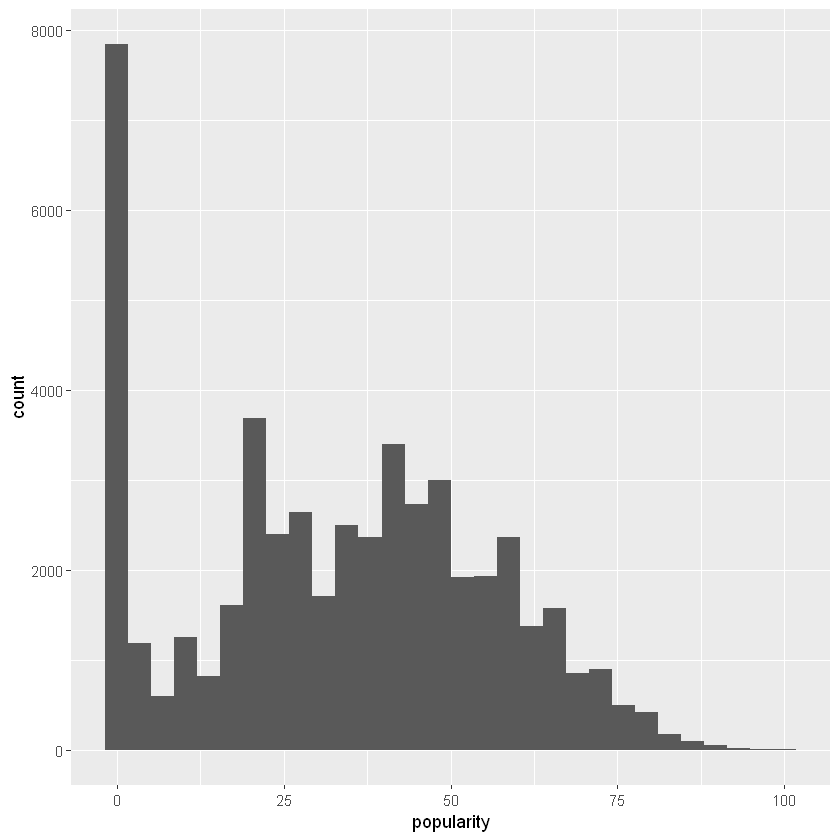

In [107]:
spotify_df |>
    ggplot(
        aes(x=popularity)
    ) +
    geom_histogram()

In [108]:
# Due to the presence of large counts of tracks with low popularity (0) we will treat this as a binary classification problem
pred_spotify_df <- spotify_df |>
                        # Create a binary variable for popularity where tracks with  >= 50 popularity rating are popular and other are not 
                        mutate(popularity = as.factor(ifelse(test = popularity >= 50, yes = 1, no = 0)))

In [109]:
# Dummy Classifier - Always Predicting the Majority Class
pred_spotify_df |>
    summarise(.by = popularity, count = (n() / nrow(pred_spotify_df)) ) 

popularity,count
<fct>,<dbl>
1,0.2586055
0,0.7413945


> From the above when we always predict the majority class (not popular) we will have an accuracy of `74.14%`

In [110]:
# Preparing Data for prediction
pred_rec  <-   recipe( popularity ~ ., data = pred_spotify_df) |>
                    # Update the roles of variables - These are not used in the Predictive Pipeline
                    update_role(track_id, new_role = 'ID') |>
                    update_role(track_name, new_role = 'track_name') |>
                    update_role(artists, new_role = 'artist_name') |>
                    update_role(album_name, new_role = 'album_name') |>
                    # logistic regression optimizer is sensitive to distances so we normalize the data
                    step_normalize(all_numeric_predictors()) |>
                    # Mutate the logical column - explicit
                    step_mutate(explicit = as.numeric(explicit)) |>
                    # Create dummy variables for the track_genre
                    step_other(track_genre, threshold = 0.009) |>
                    # Here, we dummy all the predictors
                    step_dummy(all_nominal_predictors()) |>
                    # Remove null values from the predictors
                    step_naomit(all_predictors())

In [111]:
# Preview the Prediction Pipeline
pred_rec |>
    prep() |>
    bake(new_data=NULL) |>
    glimpse()

Rows: 49,910
Columns: 46
$ track_id                <fct> 78PDj0uocOvtSJCdOt65qy, 1hP0hDL5VREpThmMOa1pta…
$ artists                 <fct> "Yo Yo Honey Singh", "Shakti Sivamani", "Babas…
$ album_name              <fct> "Bhaag Johnny", "Ailesa", "Desde Adentro - Imp…
$ track_name              <fct> "Aankhon Aankhon", "Ailesa", "El Maestro - En …
$ duration_ms             <dbl> 0.15064399, 0.20293212, -0.51963180, -0.452400…
$ explicit                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ danceability            <dbl> 1.0313247, 0.3490043, 0.4762166, 0.1466212, -0…
$ energy                  <dbl> 1.375316404, 0.587560326, 1.084881082, 1.17240…
$ key                     <dbl> 1.32401277, -0.08085819, -0.36183238, -1.20475…
$ loudness                <dbl> 0.73460869, 0.21448138, 0.49479671, 0.30591470…
$ mode                    <dbl> -1.3235551, -1.3235551, -1.3235551, -1.3235551…
$ speechiness             <dbl> -0.200261451, -0.183081236, -0.457010215, -0.2…
$ acousticness 

In [112]:
# Building a logistic regression model
log_reg_model <- logistic_reg() |>
            set_engine('glm')



# Linear model workflow
log_reg_wflow <- workflow() |>
                  # add_recipe
                  add_recipe(pred_rec) |>
                 # Add model
                  add_model(log_reg_model)

# Fit the  workflow to the data
log_reg_fit <- fit(log_reg_wflow, data = pred_spotify_df)


In [113]:
# preview the model
log_reg_fit |>
    extract_fit_engine() |>
    summary()


Call:
stats::glm(formula = ..y ~ ., family = stats::binomial, data = data)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -3.193701   0.247969 -12.879  < 2e-16 ***
duration_ms              -0.178054   0.015792 -11.275  < 2e-16 ***
explicit                  0.375297   0.039157   9.584  < 2e-16 ***
danceability              0.101158   0.013745   7.360 1.84e-13 ***
energy                   -0.094715   0.022889  -4.138 3.50e-05 ***
key                       0.006451   0.010811   0.597 0.550690    
loudness                  0.083083   0.020675   4.019 5.85e-05 ***
mode                     -0.045424   0.010915  -4.162 3.16e-05 ***
speechiness              -0.216678   0.015365 -14.102  < 2e-16 ***
acousticness             -0.143021   0.017246  -8.293  < 2e-16 ***
instrumentalness         -0.164494   0.014265 -11.532  < 2e-16 ***
liveness                 -0.188205   0.013004 -14.473  < 2e-16 ***
valence                  -0.209797   0

In [119]:
# Predicting on the full data
log_pred_class <- predict(log_reg_fit, new_data = pred_spotify_df)

# Creating a final df containing the predictions
final_df <- pred_spotify_df |>
                   mutate(log_reg_pred = log_pred_class$.pred_class)

# Confusion Matrix
conf_mat(final_df, truth = popularity, estimate = log_reg_pred)

          Truth
Prediction     0     1
         0 36232 11688
         1   771  1219

In [120]:
# Accuracy of the Prediction
accuracy(final_df, truth = popularity, estimate = log_reg_pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7503707


In [121]:
dec_tree_class <- decision_tree(mode = 'classification') |>
                    set_engine('rpart')


# Linear model workflow
dec_tree_class_wflow <- workflow() |>
                          # add_recipe
                          add_recipe(pred_rec) |>
                          # Add model
                          add_model(dec_tree_class)


# Fit the  workflow to the data
dec_tree_class_fit <- fit(dec_tree_class_wflow, data = pred_spotify_df)

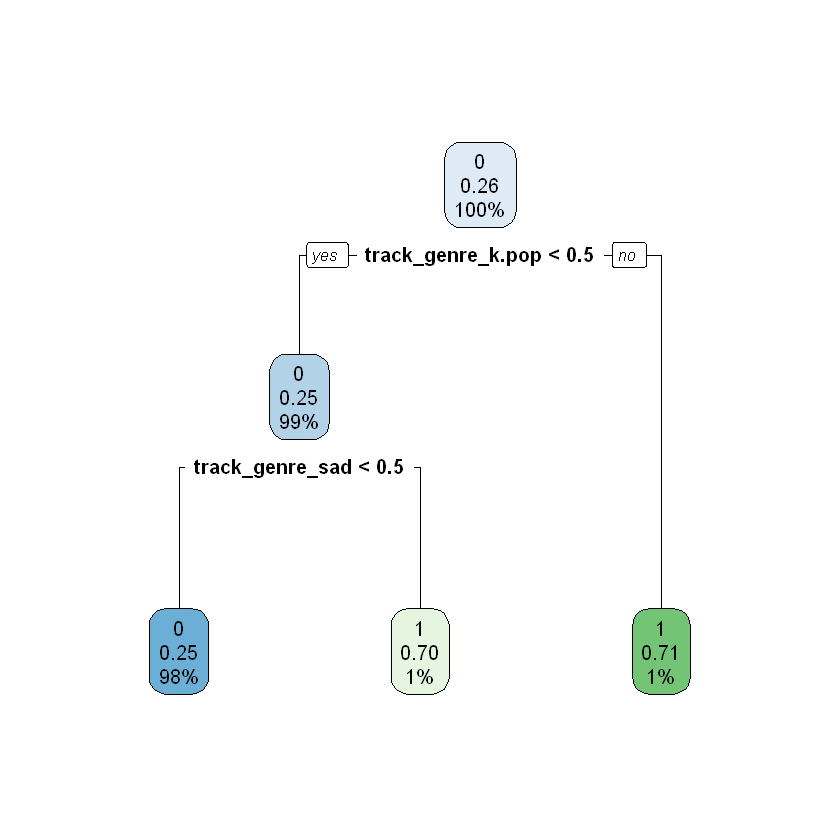

In [122]:
rpart.plot::rpart.plot(dec_tree_class_fit$fit$fit$fit, roundint = FALSE)